In [1]:
# Scientific libraries
import numpy_html
import numpy as np
import scipy.stats as stats
import scipy.special as sf
import scipy.integrate as integrate
import scipy.interpolate as interpolate

# import Pandas

import pandas as pd
import astropy.io.fits as fits
import astropy.units as u
import astropy.constants as const

# Graphic libraries
%matplotlib notebook
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
plt.style.use('mike') 
jtplot.style(context='notebook', fscale=1, grid=False)
#import seaborn as sns

#optional 3ML imports

#from threeML import *
#from astromodels.xspec.xspec_settings import *
#from astromodels.xspec.factory import *

#useful libraries

from glob import glob
import copy
import collections
#import warnings
#warnings.simplefilter('ignore')


import stan_utility
from bayescorner import bayescorner
from python_tricks import array_to_cmap


In [7]:
jla_data_set = pd.read_table('jla_lcparams.txt')


snls = jla_data_set['set'] == 1
sdss = jla_data_set['set'] == 2
lowz = jla_data_set['set'] == 3
hst  = jla_data_set['set'] == 4

/Users/jburgess/.environs/stan/lib/python3.7/site-packages/h5py-2.9.0-py3.7-macosx-10.14-x86_64.egg/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/jburgess/.environs/stan/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


# Simple Fit

<IPython.core.display.Javascript object>


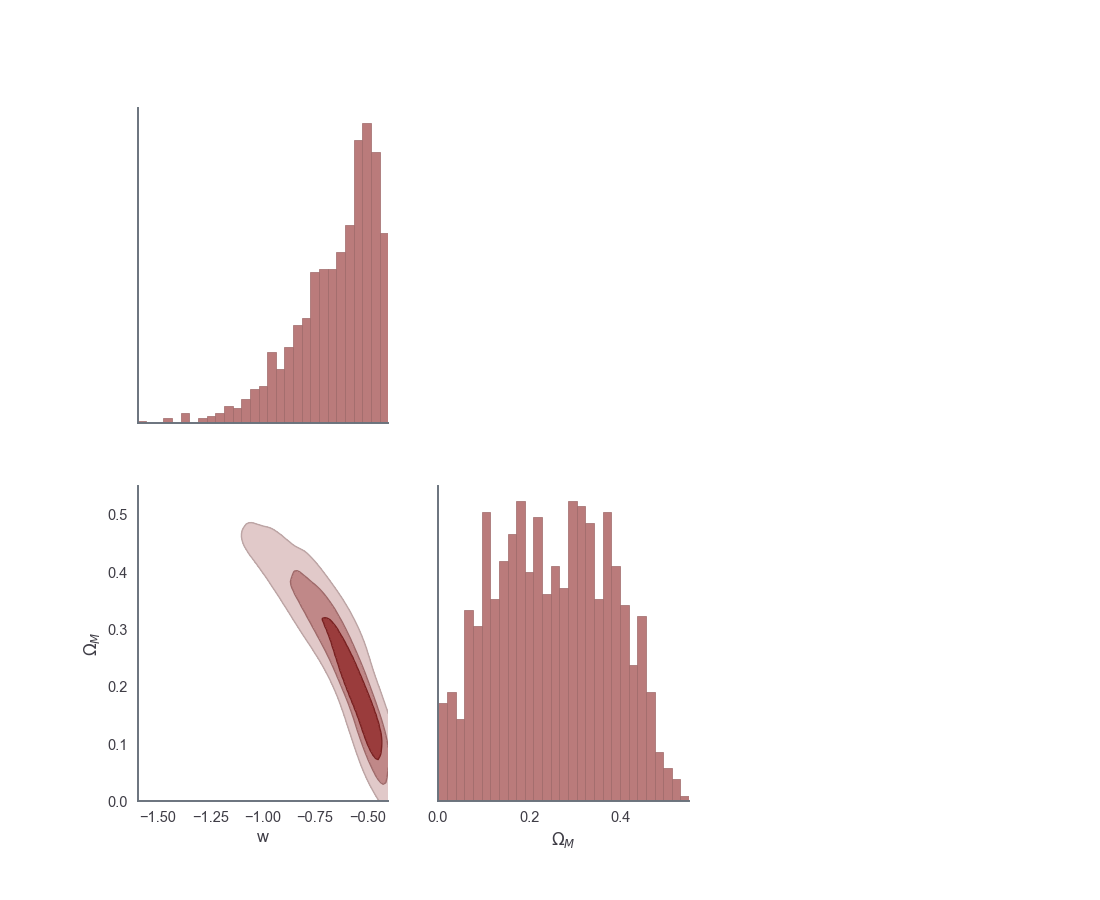

In [15]:
fit = stan_utility.StanSavedFit('sncosmo_simple_fit.h5')
fig = bayescorner( params = [fit.Om, fit.w],
            param_names=[r'$\Omega_M$', 'w'], figsize=(11,9)

);



# Biased Fit

# Proper Fit

In [16]:
fit = stan_utility.StanSavedFit('sncosmo_fit.h5')



/Users/jburgess/.environs/stan/lib/python3.7/site-packages/h5py-2.9.0-py3.7-macosx-10.14-x86_64.egg/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


<IPython.core.display.Javascript object>


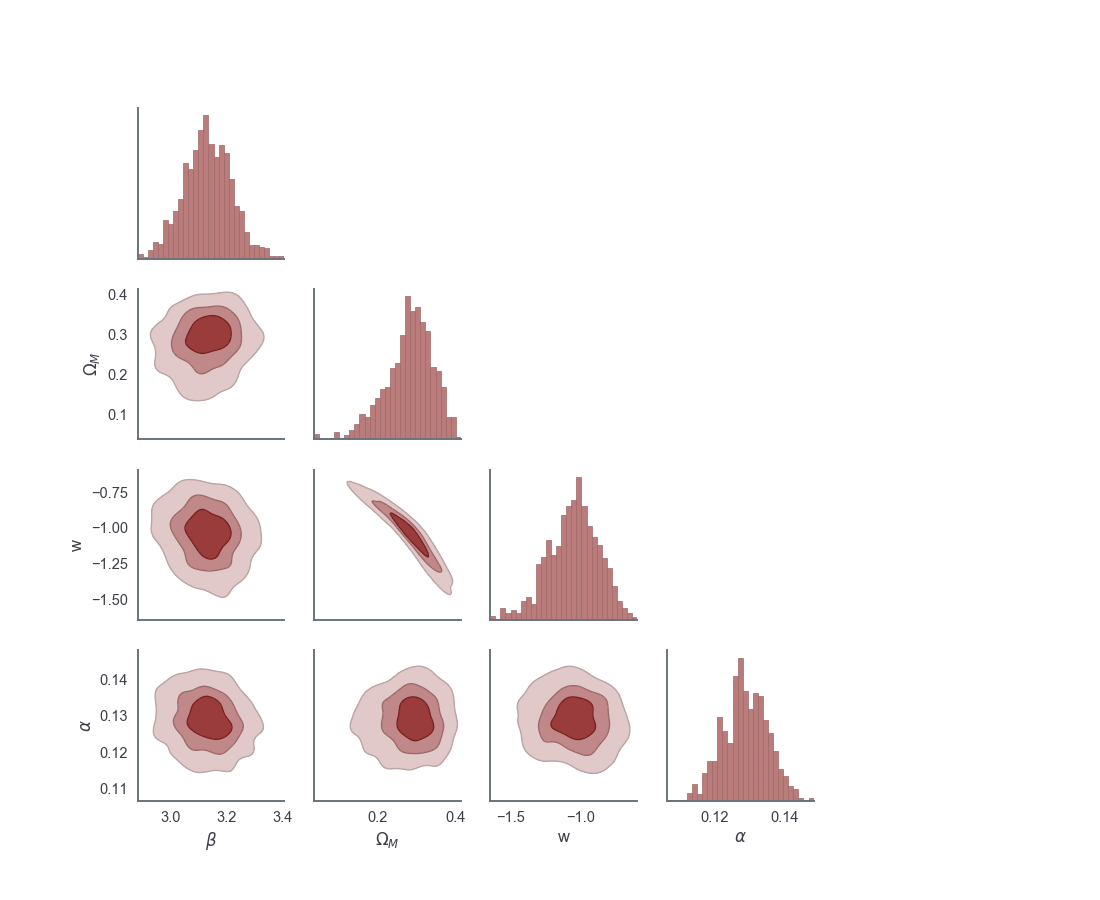

/Users/jburgess/.environs/stan/lib/python3.7/site-packages/bayescorner/compute_sigma_level.py:21: RuntimeWarning: divide by zero encountered in log
  logL = np.log(L)


In [17]:
fig = bayescorner( params = [fit.Om, fit.w, fit.alpha, fit.beta],
            param_names=[r'$\Omega_M$', 'w', r'$\alpha$', r'$\beta$'], figsize=(11,9)

);


<IPython.core.display.Javascript object>


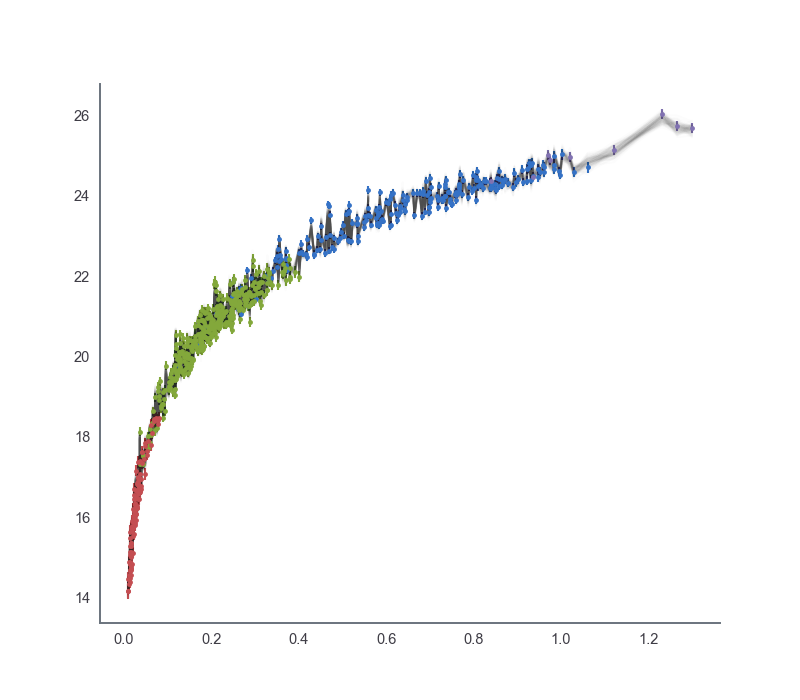

In [15]:
fig, ax = plt.subplots()

thin =10
for n, sample in enumerate(fit.m_latent[::thin]):
    
    idx = np.argsort(jla_data_set.zcmb)
    
    
    ax.plot(jla_data_set.zcmb[idx], sample[idx], color='k', alpha=0.01)
    

for ds in [snls, sdss, lowz, hst]:
    
    ax.errorbar(jla_data_set.zcmb[ds], jla_data_set.mb[ds],  yerr=jla_data_set.dmb[ds], fmt='.')
    
    



<IPython.core.display.Javascript object>


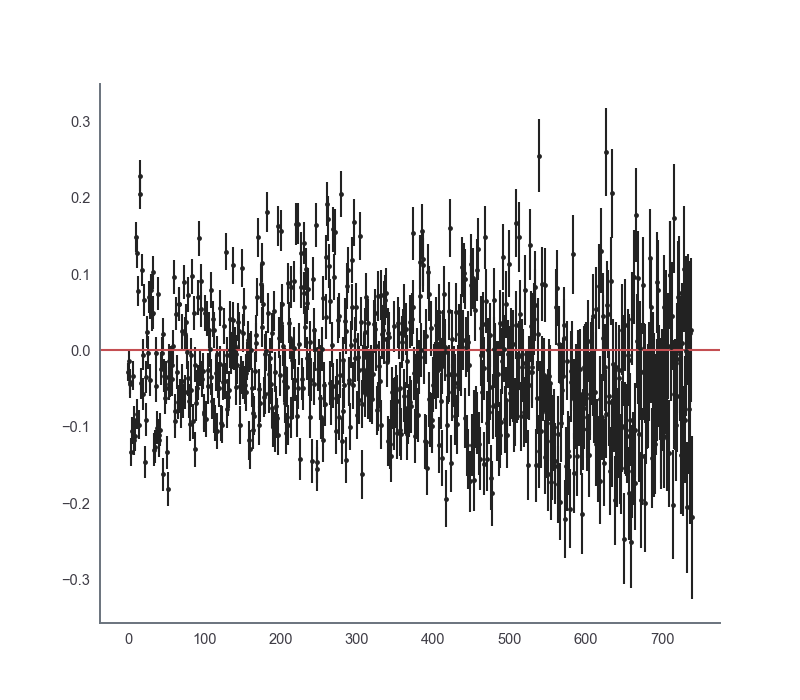

In [16]:
sort_idx = np.argsort(np.array(jla_data_set.dcolor))

fig, ax = plt.subplots()


#ax.scatter(, np.array(jla_data_set.dx1)[sort_idx] )

ax.errorbar(range(len(sort_idx)), jla_data_set.color[sort_idx], yerr=jla_data_set.dcolor[sort_idx], fmt='.', color='k' )
ax.axhline(0,color='r')



<IPython.core.display.Javascript object>


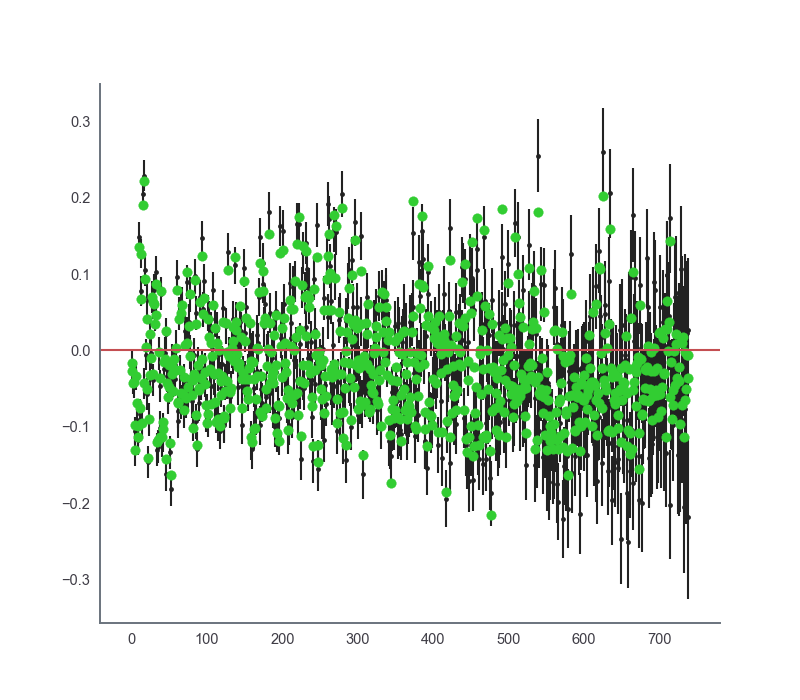

In [34]:
fig, ax = plt.subplots()

sort_idx = np.argsort(np.array(jla_data_set.dcolor))




median_c_latent = np.median(fit.c_latent, axis=0)
    
ax.errorbar(range(len(sort_idx)), jla_data_set.color[sort_idx], yerr=jla_data_set.dcolor[sort_idx], fmt='.', color='k', zorder=-1000 )
ax.axhline(0,color='r')
    
    
ax.scatter(range(len(sort_idx)), median_c_latent[sort_idx],  color='limegreen', zorder=-1 )    
    

<IPython.core.display.Javascript object>


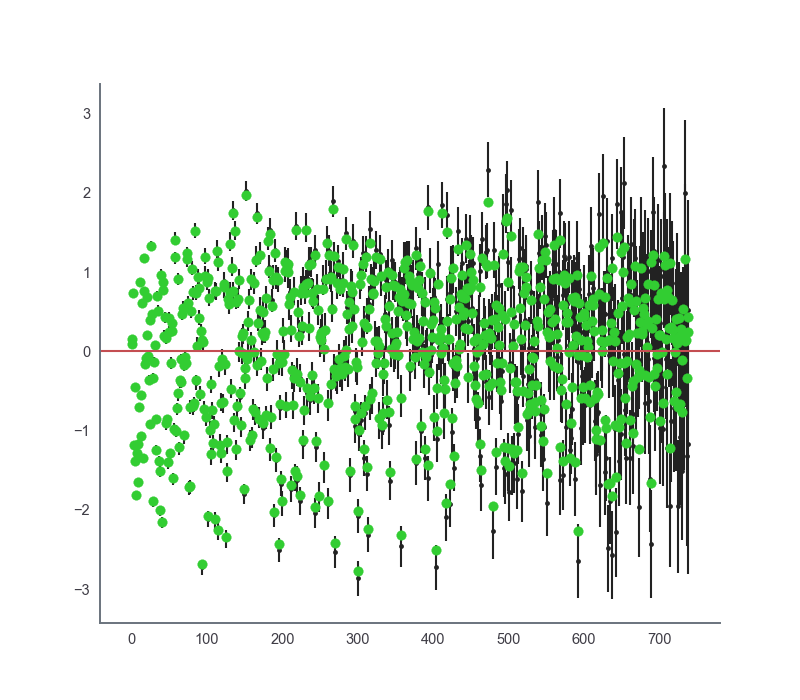

In [35]:
fig, ax = plt.subplots()

sort_idx = np.argsort(np.array(jla_data_set.dx1))




median_x1_latent = np.median(fit.x1_latent, axis=0)
    
ax.errorbar(range(len(sort_idx)), jla_data_set.x1[sort_idx], yerr=jla_data_set.dx1[sort_idx], fmt='.', color='k', zorder=-1000 )
ax.axhline(0,color='r')
    
    
ax.scatter(range(len(sort_idx)), median_x1_latent[sort_idx],  color='limegreen', zorder=-1 )    
    

<IPython.core.display.Javascript object>


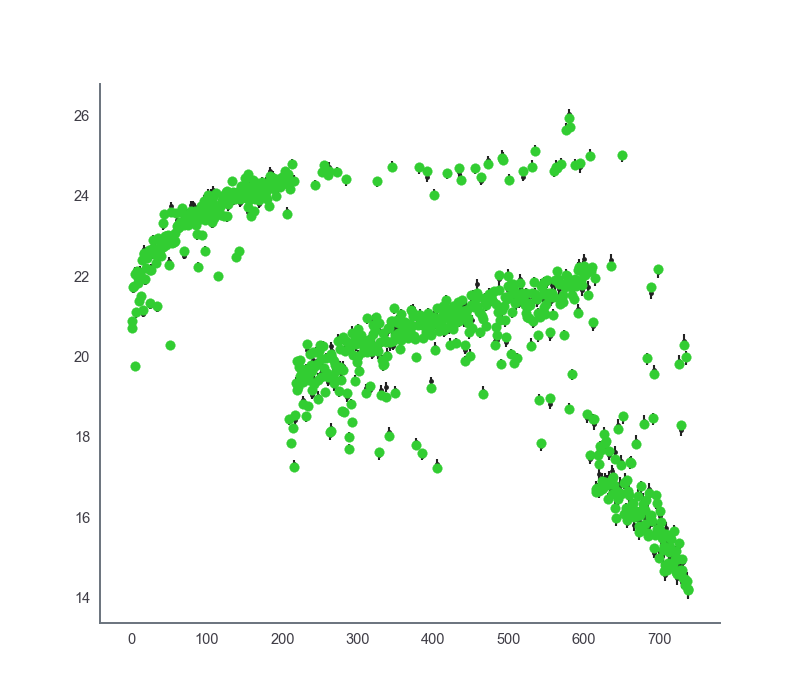

In [36]:
fig, ax = plt.subplots()

sort_idx = np.argsort(np.array(jla_data_set.dmb))




median_m_latent = np.median(fit.m_latent, axis=0)
    
ax.errorbar(range(len(sort_idx)), jla_data_set.mb[sort_idx], yerr=jla_data_set.dmb[sort_idx], fmt='.', color='k', zorder=-1000 )
#ax.axhline(0,color='r')
    
    
ax.scatter(range(len(sort_idx)), median_m_latent[sort_idx],  color='limegreen', zorder=-1 )    
    

<IPython.core.display.Javascript object>


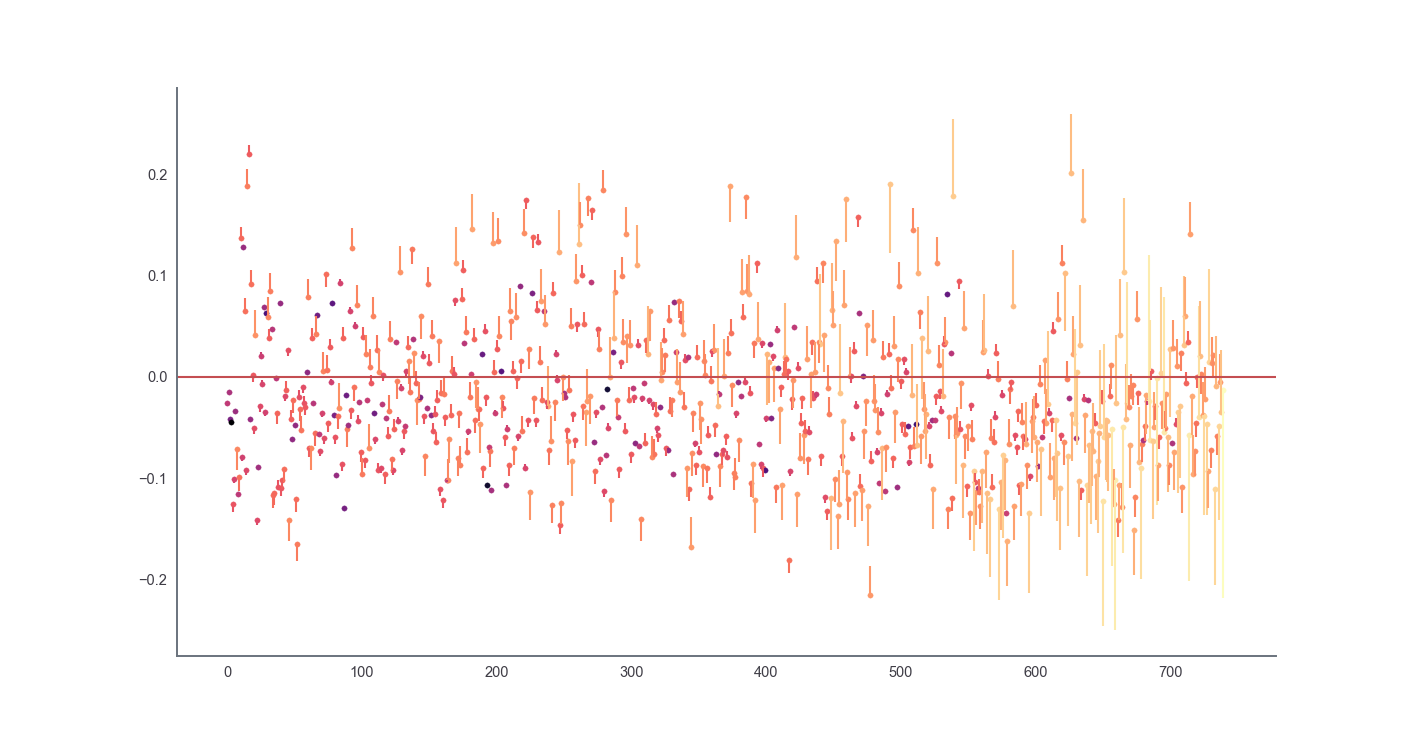

In [13]:
fig, ax = plt.subplots()

sort_idxs = np.argsort(np.array(jla_data_set.dcolor))




median_c_latent = np.median(fit.c_latent, axis=0)




pulls = np.abs(jla_data_set.color[sort_idxs] - median_c_latent[sort_idxs])



_ , colors= array_to_cmap(pulls,cmap='magma',use_log=True)

for i, sort_idx in enumerate(sort_idxs):


    ax.vlines(i, jla_data_set.color[sort_idx], median_c_latent[sort_idx],colors=colors[i] )
    ax.scatter(i, median_c_latent[sort_idx],  color=colors[i],s=15 , zorder=-1 )    
ax.axhline(0,color='r')
    
    

    

In [10]:
colors